In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics



In [ ]:
data = pd.read_csv('/content/clean_monthly_df_human.csv')
data.time=pd.to_datetime(data.time,dayfirst=True)

In [ ]:
data.columns

Index(['time', 'MIN_TEMPERATURE_C', 'max_clients_month',
       'total_Holiday_Food_Related', 'total_consommation',
       'max_pdl_total_daily_load', 'max_pdl_daily_load'],
      dtype='object')

In [ ]:
df_input=data[['MIN_TEMPERATURE_C', 'max_clients_month',
       'total_Holiday_Food_Related', 'total_consommation',
       'max_pdl_total_daily_load', 'max_pdl_daily_load']]

train,test=df_input[:-7],df_input[-7:]
X_train,y_train=np.array(train.drop(['max_pdl_daily_load'],axis=1)),np.array(train.max_pdl_daily_load)
X_test,y_test=np.array(test.drop(['max_pdl_daily_load'],axis=1)),np.array(test.max_pdl_daily_load)


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 36.0 MB/s 
     |████████████████████████████████| 9.5 MB 47.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima

stepwise_model = auto_arima(y=y_train,X=X_train,start_p=1, start_q=1,max_p=7, max_q=7,
                            max_P=7, max_Q=7,max_order=None,m=12,stepwise=True,
                            seasonal=True,stationary=True,suppress_warnings=True,
                            trace=True,)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=740.796, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=722.787, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=711.410, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=719.169, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=907.676, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=715.442, Time=0.24 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=712.758, Time=1.28 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=737.911, Time=0.89 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=709.827, Time=0.66 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=712.154, Time=1.40 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=714.490, Time=2.46 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=719.862, Time=0.90 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=703.055, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=712.681, Time=0.24 sec
 ARIMA(2,0,0)(1,0,1)[12] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -341.257
Date:                            Wed, 18 Aug 2021   AIC                            700.514
Time:                                    16:29:33   BIC                            719.363
Sample:                                         0   HQIC                           707.887
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.3657      9.645     -0.142      0.887     -20.269      17.537
x2             0.1663      0.058      2.863      0.004       0.052       0.280
x3            11.0470      2.062      5.356      0.000       7.005      15.089
x4            -0.0003      0.000     -0.699      0.485      -0.001       0.001
x5             0.0325      0.007      4.374      0.000       0.018       0.047
ar.L1          0.2170      0.151      1.439      0.150      -0.079       0.513
ar.L2          0.4821      0.212      2.272      0.023       0.066       0.898
ar.S.L12       0.4805      0.234      2.052      0.040       0.022       0.939
sigma2      6618.1601   1776.651      3.725      0.000    3135.988    1.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                11.80
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             0.82
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)} %')
  #mape.append(mean_absolute_percentage_error(y_true, y_pred))
  #rmse.append(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  return

In [ ]:
test

,MIN_TEMPERATURE_C,max_clients_month,total_Holiday_Food_Related,total_consommation,max_pdl_total_daily_load,max_pdl_daily_load
60,8,5339,1,249158.97,26139,1560
61,11,5348,0,222261.04,23365,1451
62,9,5321,0,219707.61,23370,1463
63,12,5324,7,207015.41,18875,1599
64,18,5326,26,193552.21,15439,1400
65,20,5324,0,182548.79,14697,1105
66,23,5277,1,177683.15,13664,1084


In [ ]:
y_test=pd.DataFrame(data=y_test,index=np.arange(60,67),columns=['actual'])

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=7, X=X_test, return_conf_int=True)
#alpha=confidence_interval=0.05 (previous method)
forecast = pd.DataFrame(forecast,columns=['PDL_pred'])
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(60, 67)
df_conf = df_conf.set_index("new_index")
timeseries_evaluation_metrics_func(y_test.actual, forecast.PDL_pred)

Evaluation metric results:-
MSE is : 12773.40054719756
MAE is : 89.0517492694256
RMSE is : 113.01946977046724
MAPE is : 6.8727163566025835 %
R2 is : 0.6506337485416404

SMAPE is : 0.9072458464728825

MASE is : 0.692112040954085


In [ ]:
forecast["new_index"] = range(60, 67)
forecast = forecast.set_index("new_index")

In [ ]:
forecast

,PDL_pred
new_index,
60,1564.780325
61,1461.624358
62,1501.315888
63,1440.932762
64,1547.587326
65,1292.662669
66,1160.324441


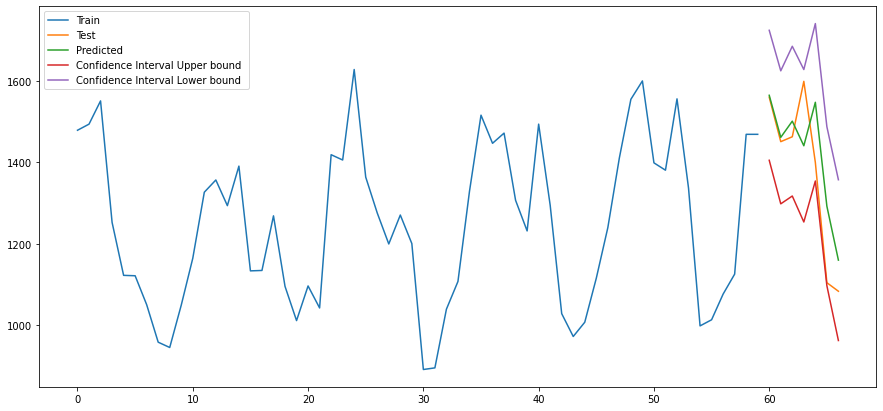

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(y_train, label='Train ')
plt.plot(y_test.actual, label='Test ')
plt.plot(forecast['PDL_pred'], label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

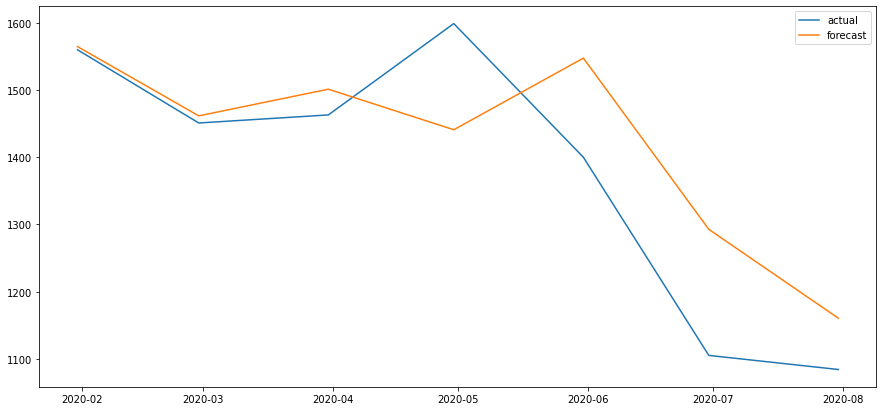

In [ ]:
# plot baseline and predictions
time=data.time[-7:]

plt.plot(time,y_test.actual,label='actual')
plt.plot(time,forecast['PDL_pred'],label='forecast')
plt.legend()
plt.show()

# peak period

In [ ]:
timeseries_evaluation_metrics_func(y_test.actual[:3], forecast.PDL_pred[:3])

Evaluation metric results:-
MSE is : 534.6119184974157
MAE is : 17.906856982121855
RMSE is : 23.121676377317794
MAPE is : 1.2192116174419647 %
R2 is : 0.7755198625325772

SMAPE is : 0.39785409558073587

MASE is : 0.29598110714251


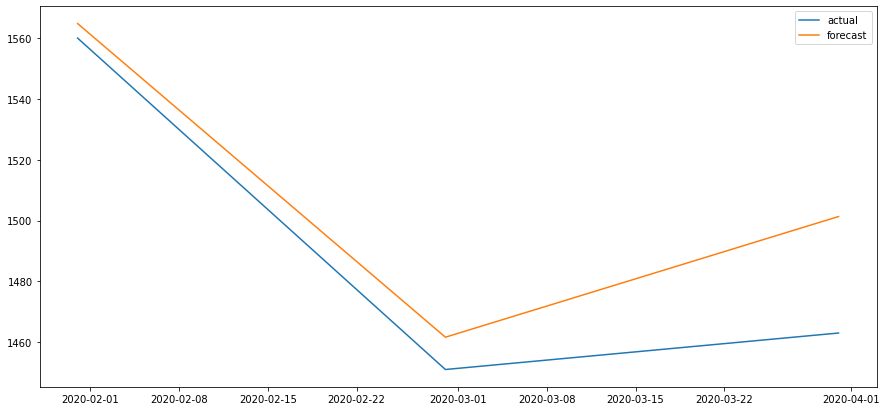

In [ ]:
plt.plot(time[:3],y_test.actual[:3],label='actual')
plt.plot(time[:3],forecast['PDL_pred'][:3],label='forecast')
plt.legend()
plt.show()